# TESS phase coverage

In this tutorial, we use portrait to estimate the overall phase coverage of the TESS light curve of TOI-120.

## Loading the data

We start by downloading the TESS light curve of TOI-120 using the `lightkurve` package.

In [1]:
import lightkurve as lk
import numpy as np

# single sector
lc = lk.search_lightcurve("TOI 120", author="SPOC", exptime=120)[0].download()

# masking nans
time = lc.time.to_value("btjd")
flux = lc.pdcsap_flux.to_value().filled(np.nan)
mask = np.isnan(flux) | np.isnan(time)
time = time[~mask].astype(float)

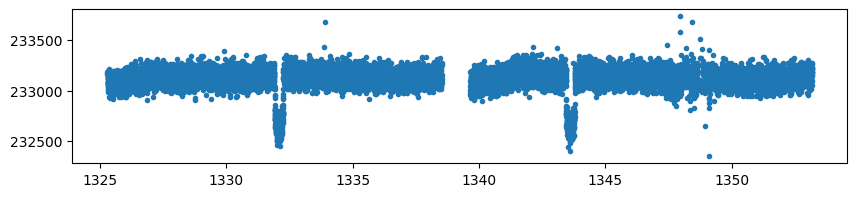

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
_ = plt.plot(time, flux[~mask], ".")

## Phase coverage

The light curve shows the transits of [TOI-120 b](https://science.nasa.gov/exoplanet-catalog/hd-1397-b/) which has an orbital period of 11.5 days. Obviously this period is completely covered by the TESS observations, indeed

In [3]:
from portrait import coverage

period = 11.5
single_phase_coverage = coverage(time)(period)
print(f"Phase coverage: {single_phase_coverage*100:.0f}%")

Phase coverage: 100%


However, since only one sector has been observed, longer periods might lack coverage. We can compute the phase coverage for a range of periods with

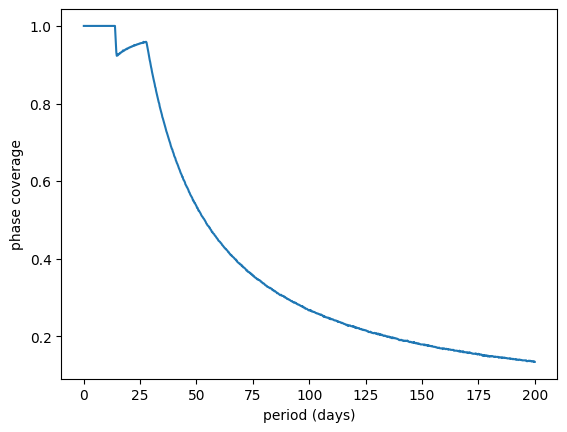

In [4]:
import matplotlib.pyplot as plt

periods = np.linspace(0.1, 200, 1000)
single_phase_coverage = coverage(time)(periods)

plt.plot(periods, single_phase_coverage)
plt.xlabel("period (days)")
_ = plt.ylabel("phase coverage")

A mean estimate of the amount of phase not observed for a range of periods can be obtained with

In [5]:
min_period, max_period = 10, 25
long_period_observed = np.mean(
    single_phase_coverage[(periods > min_period) & (periods < max_period)]
)
print(
    f"{min_period}-{max_period} days: {100 - long_period_observed**3 *100:.2f}% unobserved"
)

10-25 days: 12.22% unobserved


Which means TESS has about that percents of chances to have missed a longer-period transiting exoplanet around TOI-120 (ignoring all other probabilities). Of course this applies more or less to all targets observed in a single TESS sector.

## Periodic transit detection capability

Given these observations, what are the chances to see two transits of an exoplanet with a given orbital period $P$? 

To answer this question, portait can be use to compute the amount of time a given phase has been observed. This can be done with

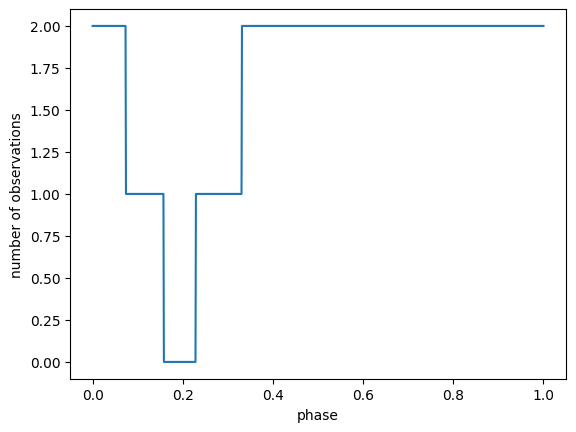

In [6]:
from portrait.core import phase_coverage

trial_period = 16
phases = np.linspace(0, 1, 1000)
observed = phase_coverage(time, phases)(trial_period)

plt.plot(phases, observed)
plt.xlabel("phase")
_ = plt.ylabel("number of observations")

We see here that a portion of the phase space is covered less than two times, meaning that we would not be able to see two transits of this particular exoplanet. Let's compute this portion

In [7]:
less_than_2 = np.mean(observed < 2)
print(f"Portions covered less than twice: {less_than_2*100:.0f}%")

Portions covered less than twice: 26%


This can be specified in the `coverage` function. To compute the phase coverage for multiple events (2 here):

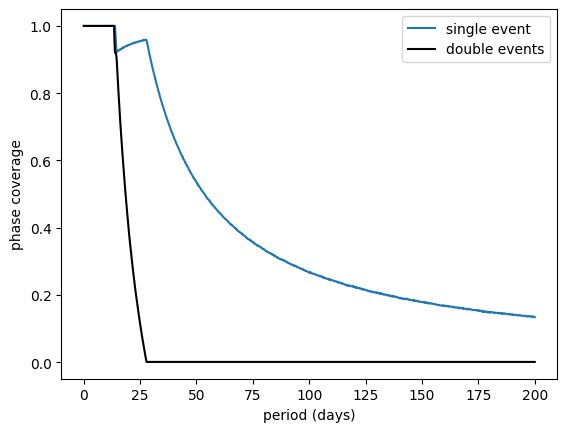

In [8]:
import matplotlib.pyplot as plt

periods = np.linspace(0.1, 200, 1000)
double_phase_coverage = coverage(time, n=2)(periods)

plt.plot(periods, single_phase_coverage, label="single event")
plt.plot(periods, double_phase_coverage, label="double events", c="k")
plt.xlabel("period (days)")
plt.ylabel("phase coverage")
_ = plt.legend()

And again

In [9]:
min_period, max_period = 10, 25
long_period_observed = np.mean(
    double_phase_coverage[(periods > min_period) & (periods < max_period)]
)
print(
    f"{min_period}-{max_period} days: {100 - long_period_observed**3 *100:.2f}% unobserved"
)

10-25 days: 77.53% unobserved


If two transits are required to detect an exoplanet, long periods are largely unobserved here.